In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("predictive_maintenance.csv")

In [9]:
# Definir las funciones para generar los valores aleatorios
def generate_motor_temp(target):
    if target == 0:
        return round(np.random.uniform(200, 224), 2)
    else:
        return round(np.random.choice([np.random.uniform(190, 200), np.random.uniform(224, 230)]), 2)

def generate_vibration(target):
    if target == 0:
        return round(np.random.uniform(0.04, 0.05), 2)
    else:
        return round(np.random.choice([np.random.uniform(0.03, 0.04), np.random.uniform(0.05, 0.06)]), 2)

# Generar las nuevas columnas
df['motor temperature[F]'] = df['Target'].apply(generate_motor_temp)
df['excessive vibration[IPS]'] = df['Target'].apply(generate_vibration)

# Insertar las nuevas columnas antes de la columna 'Target'
target_col_index = df.columns.get_loc('Target')
df.insert(target_col_index, 'motor temperature[F]', df.pop('motor temperature[F]'))
df.insert(target_col_index + 1, 'excessive vibration[IPS]', df.pop('excessive vibration[IPS]'))

# Guardar el DataFrame modificado a un nuevo archivo CSV si es necesario
df.to_csv('datos_maquinaria.csv', index=False)

In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,motor temperature[F],Failure Type,excessive vibration[IPS]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,206.53,No Failure,0.04
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,211.70,No Failure,0.05
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,213.46,No Failure,0.04
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,208.95,No Failure,0.05
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,201.57,No Failure,0.05


In [11]:
# Eliminar las columnas que no nos interesan como el ID
df = df.drop(columns=['UDI','Product ID','Failure Type'], axis = 1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,motor temperature[F],excessive vibration[IPS]
0,M,298.1,308.6,1551,42.8,0,0,206.53,0.04
1,L,298.2,308.7,1408,46.3,3,0,211.70,0.05
2,L,298.1,308.5,1498,49.4,5,0,213.46,0.04
3,L,298.2,308.6,1433,39.5,7,0,208.95,0.05
4,L,298.2,308.7,1408,40.0,9,0,201.57,0.05


In [12]:
# Descripción de los datos
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.004930,2.000259,295.30,298.30,300.10,301.50,304.50
Process temperature [K],10000.0,310.005560,1.483734,305.70,308.80,310.10,311.10,313.80
Rotational speed [rpm],10000.0,1538.776100,179.284096,1168.00,1423.00,1503.00,1612.00,2886.00
Torque [Nm],10000.0,39.986910,9.968934,3.80,33.20,40.10,46.80,76.60
Tool wear [min],10000.0,107.951000,63.654147,0.00,53.00,108.00,162.00,253.00
Target,10000.0,0.033900,0.180981,0.00,0.00,0.00,0.00,1.00
motor temperature[F],10000.0,211.948870,7.395828,190.00,205.80,211.94,218.11,229.97
excessive vibration[IPS],10000.0,0.045083,0.005321,0.03,0.04,0.05,0.05,0.06


In [13]:
# Checar si existen valores null en el dataset
df.isnull().sum()

Type                        0
Air temperature [K]         0
Process temperature [K]     0
Rotational speed [rpm]      0
Torque [Nm]                 0
Tool wear [min]             0
Target                      0
motor temperature[F]        0
excessive vibration[IPS]    0
dtype: int64

In [14]:
# Generar un encoder de los datos en la columna 'Type'
encoder = LabelEncoder()

df['Type'] = encoder.fit_transform(df['Type'])

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,motor temperature[F],excessive vibration[IPS]
0,2,298.1,308.6,1551,42.8,0,0,206.53,0.04
1,1,298.2,308.7,1408,46.3,3,0,211.70,0.05
2,1,298.1,308.5,1498,49.4,5,0,213.46,0.04
3,1,298.2,308.6,1433,39.5,7,0,208.95,0.05
4,1,298.2,308.7,1408,40.0,9,0,201.57,0.05


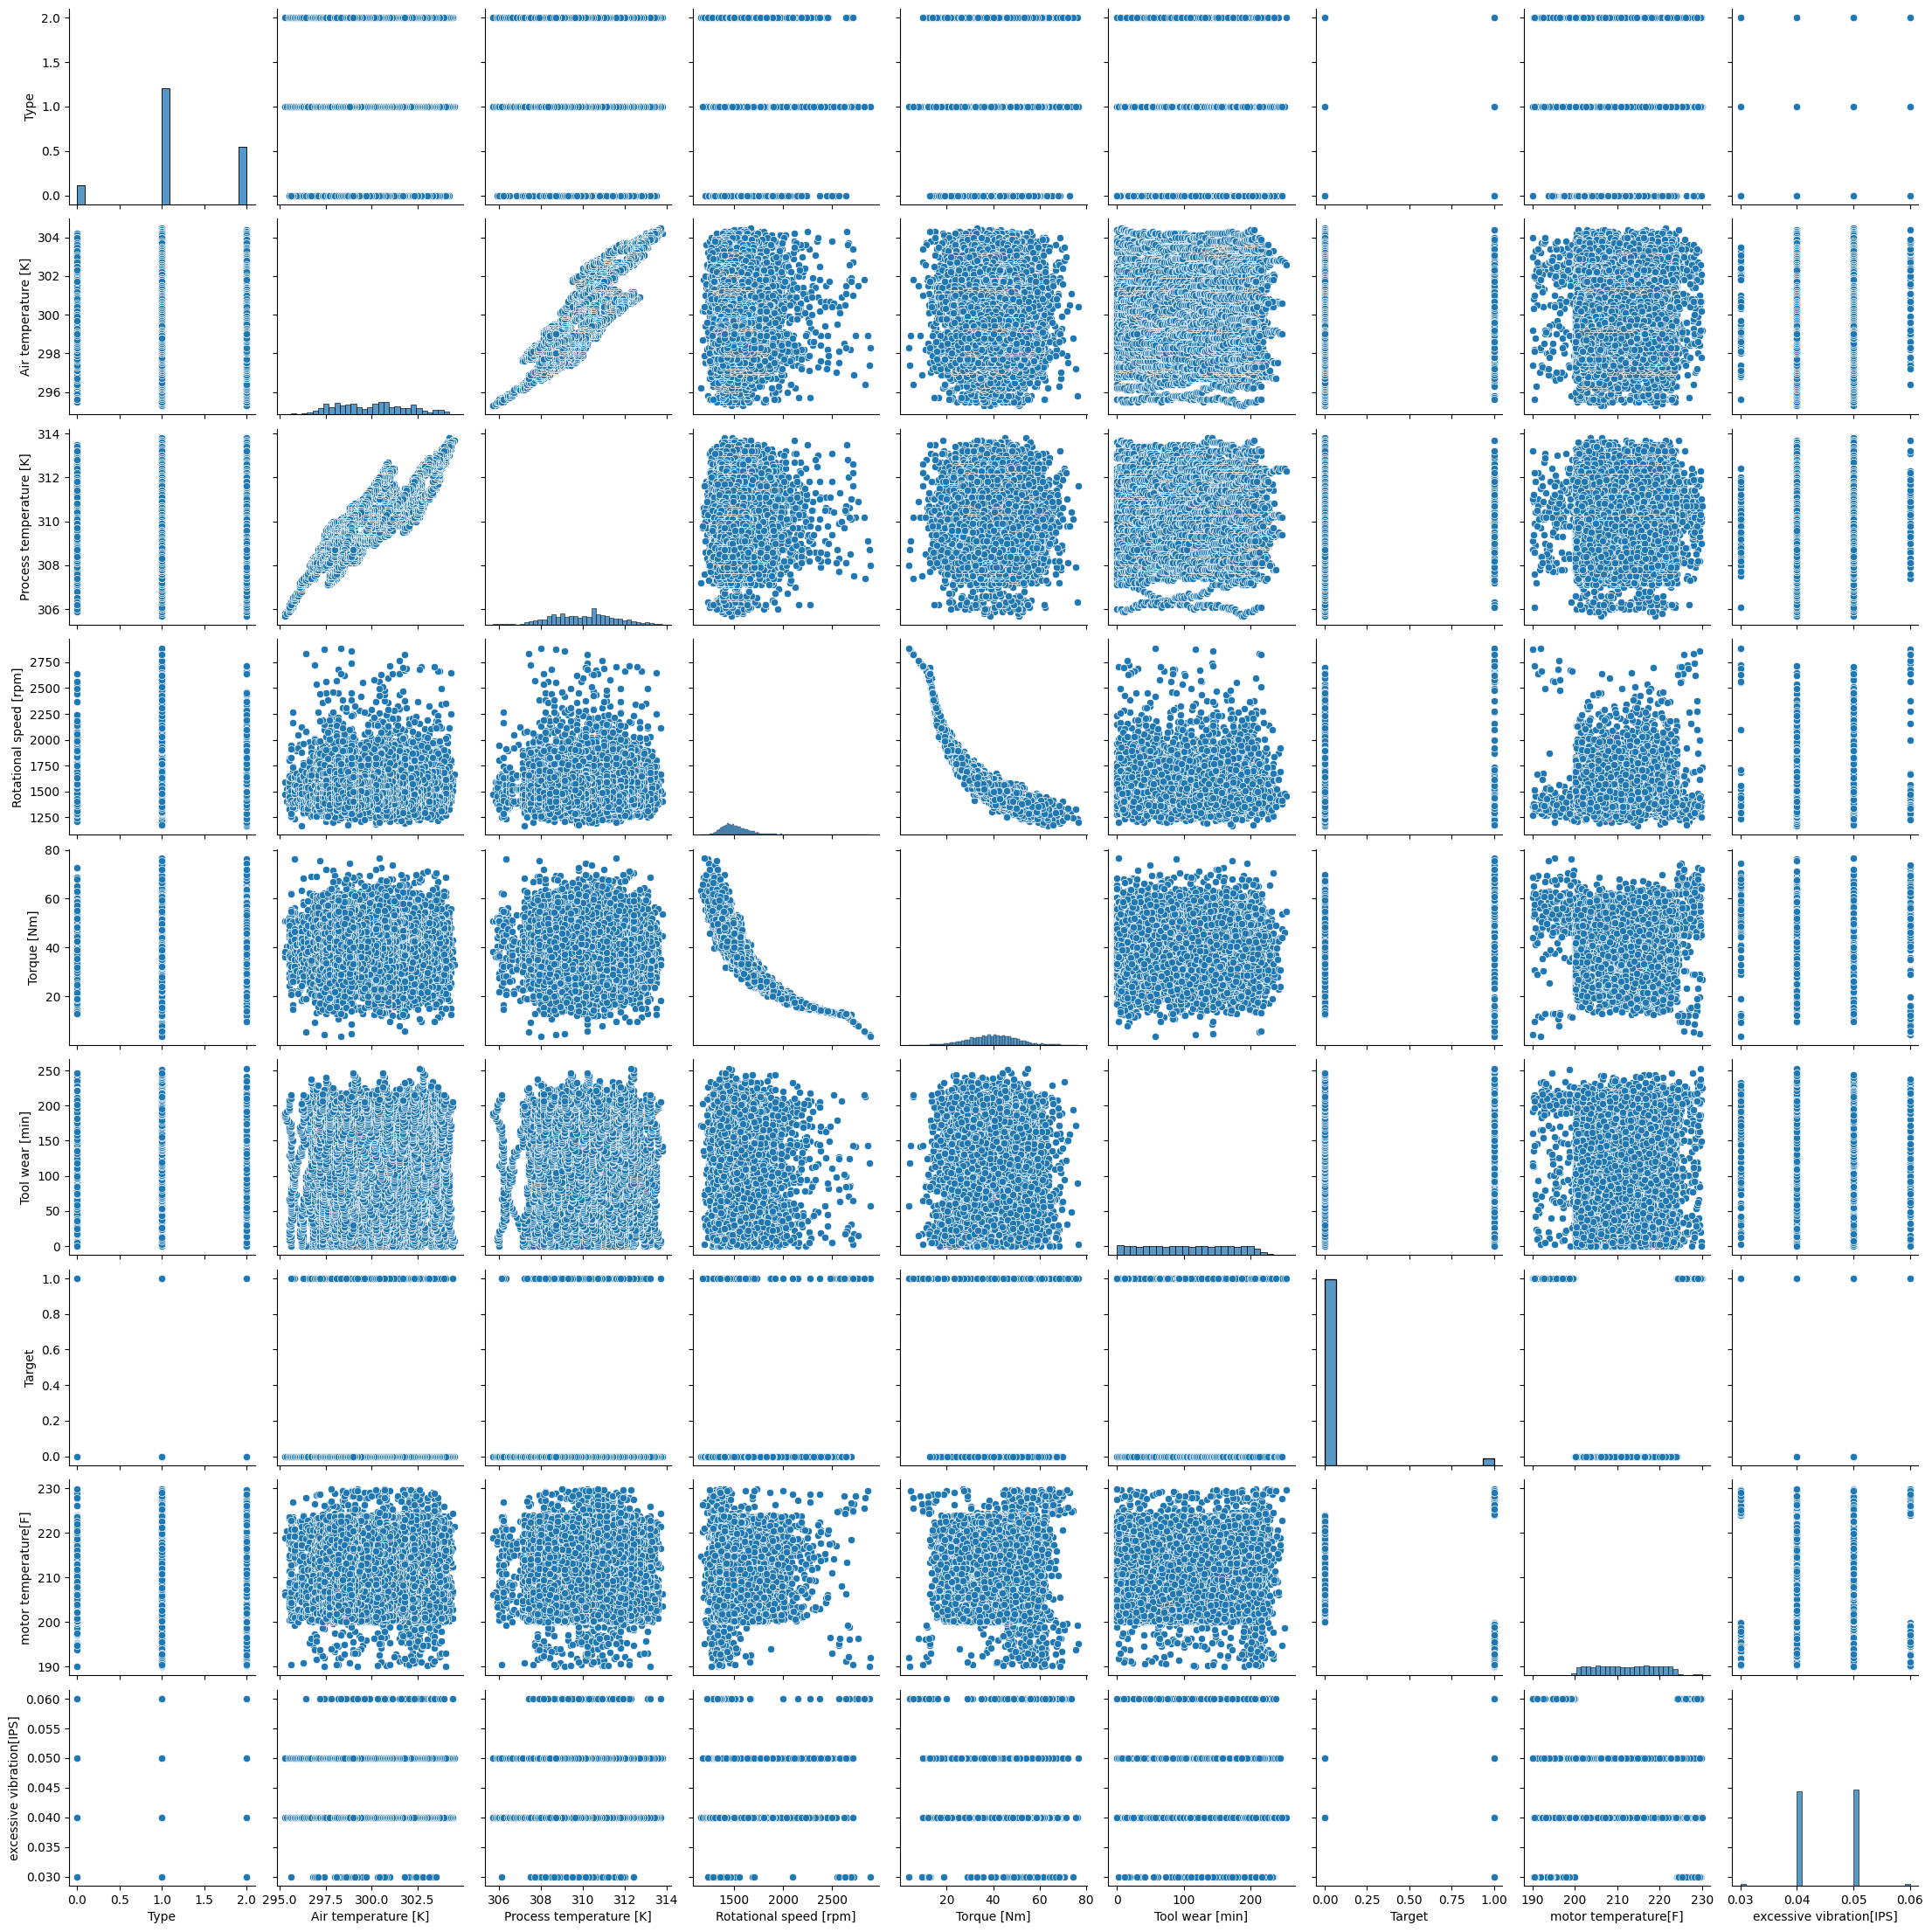

In [15]:
# Visualizacion de los datos
sns.pairplot(df)
plt.show()

In [16]:
y = df['Target'] # Etiquetas
X = df.drop(columns = 'Target', axis=1) # Caracterisitcas
print(y.shape,X.shape)

# Generar un split 80-20 de los datos para entrenamiento y testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=789)
# Visualizar las dimemsionesw de los datos x,y
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(10000,) (10000, 8)
(8000, 8) (2000, 8) (8000,) (2000,)


In [17]:
# Escalar las caracteristicas
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc,columns=X_train.columns)

X_test_sc = scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc,columns=X_test.columns)

In [18]:
# Generar un modelo de regresion lineal
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [19]:
# Predicciones con los datos de testing
y_pred1 = LR.predict(X_test_sc)
# Obtener el accuracy
print(f'Accuracy Score: {accuracy_score(y_test,y_pred1)}')

Accuracy Score: 0.9665


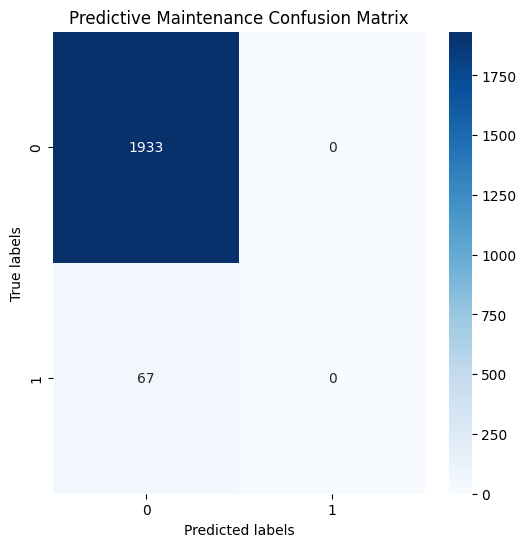

In [20]:
# Calcular la matriz de confusion
cm = confusion_matrix(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(6, 6))

# Graficar usando un heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)

# Ejes y titulo
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Predictive Maintenance Confusion Matrix')

plt.show()